# TRANSPORTATION-PATHFINDING-ANALYSIS

## CREATING TRANSPORTATION SCENARIO

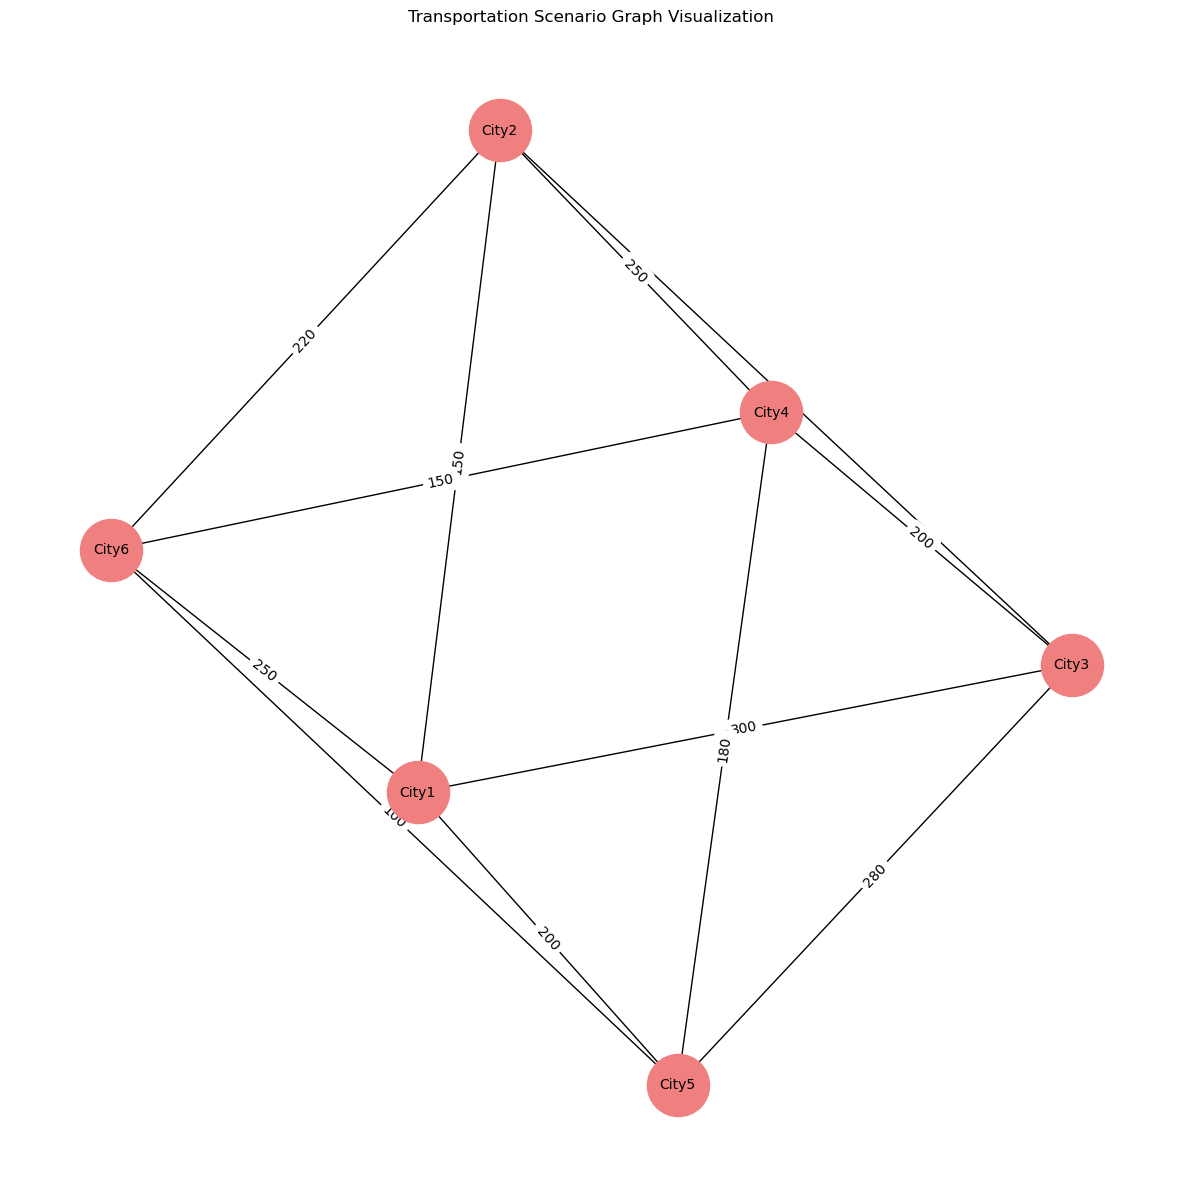

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create a custom transportation scenario graph
def create_custom_scenario_graph():
    # Define nodes representing cities in the transportation scenario
    nodes = ['City1', 'City2', 'City3', 'City4', 'City5', 'City6']

    # Define direct connections (highways) between cities along with associated distances and travel times
    direct_edges = [('City1', 'City2', {'distance': 150, 'travel_time': 2}),
                    ('City2', 'City3', {'distance': 120, 'travel_time': 1.5}),
                    ('City3', 'City4', {'distance': 200, 'travel_time': 2.5}),
                    ('City4', 'City5', {'distance': 180, 'travel_time': 2}),
                    ('City5', 'City6', {'distance': 100, 'travel_time': 1}),
                    ('City6', 'City1', {'distance': 250, 'travel_time': 3})]

    # Define indirect connections (railways) between cities along with associated distances and travel times
    indirect_edges = [('City1', 'City3', {'distance': 300, 'travel_time': 4}),
                      ('City2', 'City4', {'distance': 250, 'travel_time': 3}),
                      ('City3', 'City5', {'distance': 280, 'travel_time': 3.5}),
                      ('City4', 'City6', {'distance': 150, 'travel_time': 2}),
                      ('City5', 'City1', {'distance': 200, 'travel_time': 2.5}),
                      ('City6', 'City2', {'distance': 220, 'travel_time': 2.8})]

    # Create a graph object using the NetworkX library
    G = nx.Graph()
    
    # Add nodes and edges to the graph
    G.add_nodes_from(nodes)
    G.add_edges_from(direct_edges + indirect_edges)

    # Return the created graph
    return G

# Define a function to visualize the transportation scenario graph
def visualize_scenario_graph(graph):
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(15, 15))

    # Use a spring layout for node positioning
    pos = nx.spring_layout(graph)

    # Extract edge labels indicating distances between cities
    edge_labels = {(node1, node2): attrs['distance'] for node1, node2, attrs in graph.edges(data=True)}

    # Draw the graph with nodes, labels, and edges
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightcoral', font_size=10, font_color='black', ax=ax)
    
    # Add edge labels indicating distances
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Set the title for the visualization
    plt.title("Transportation Scenario Graph Visualization")

    # Display the plot
    plt.show()

# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()
visualize_scenario_graph(scenario_graph)


## DFS SHORTEST PATH

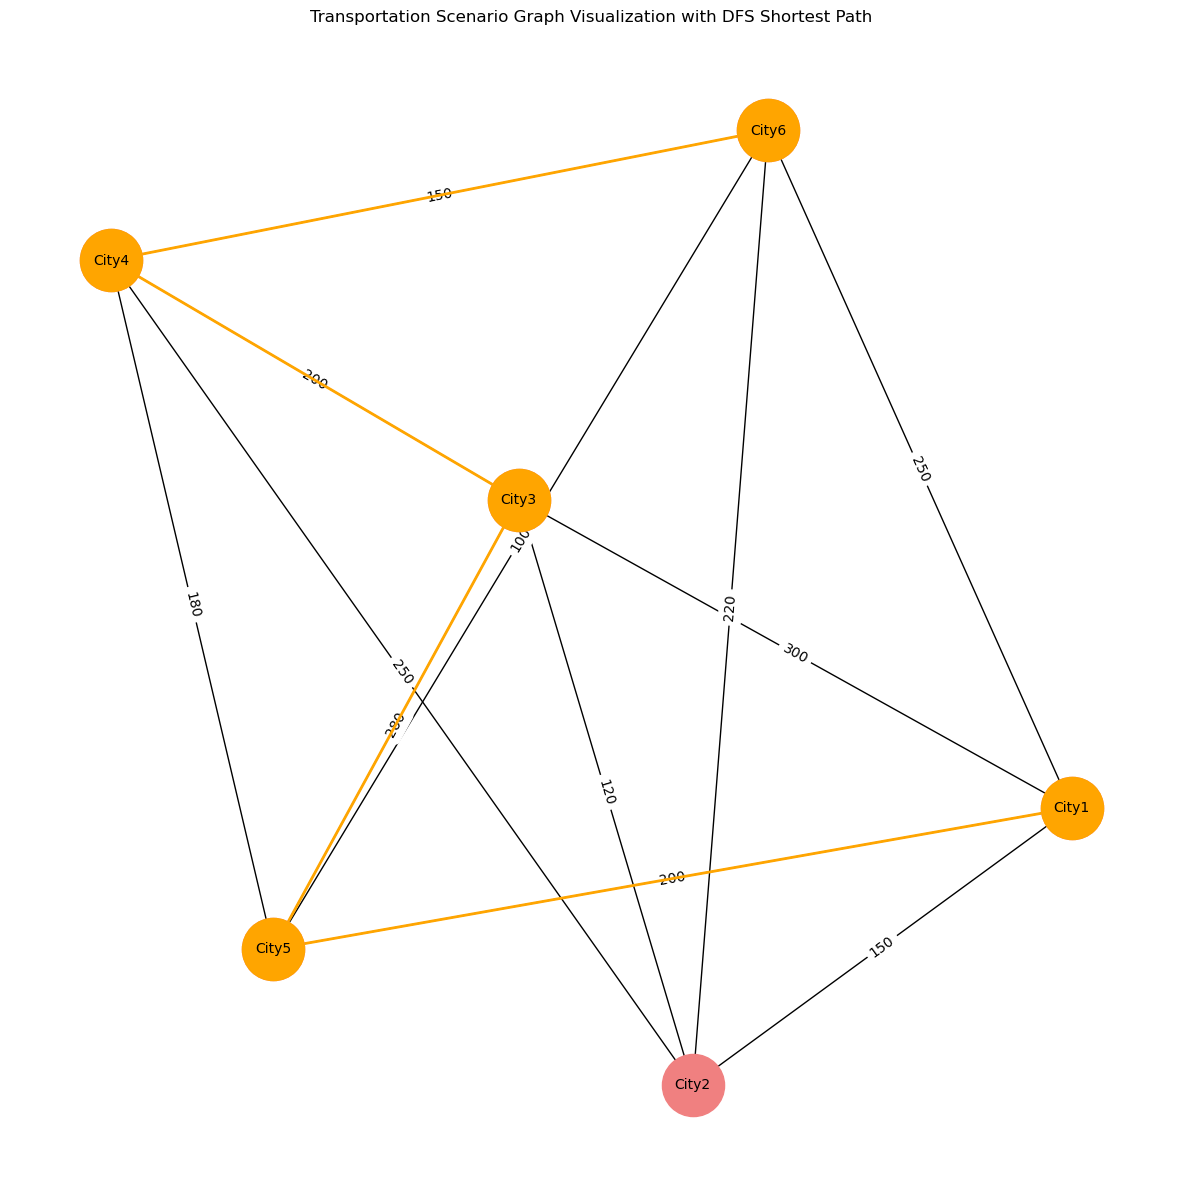

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()

# Define a function to find the shortest path using Depth-First Search (DFS)
def dfs_shortest_path_scenario(graph, start, goal):
    # Initialize a stack with the starting node and its path
    stack = [(start, [start])]

    while stack:
        # Pop the top node and its path from the stack
        current_node, path = stack.pop()

        # Check if the current node is the goal
        if current_node == goal:
            return path

        # Explore neighbors and add to the stack if not visited
        for neighbor in graph.neighbors(current_node):
            if neighbor not in path:
                stack.append((neighbor, path + [neighbor]))

# Define a function to visualize the graph with the highlighted DFS path
def visualize_graph_with_path_dfs_scenario(graph, path):
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(15, 15))

    # Use a spring layout for node positioning
    pos = nx.spring_layout(graph)

    # Extract edge labels indicating distances between cities
    edge_labels = {(node1, node2): attrs['distance'] for node1, node2, attrs in graph.edges(data=True)}

    # Draw the graph with nodes, labels, and edges
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightcoral', font_size=10, font_color='black', ax=ax)
    
    # Add edge labels indicating distances
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Highlight the DFS path
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='orange', node_size=2000)
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='orange', width=2)

    # Set the title for the visualization
    plt.title("Transportation Scenario Graph Visualization with DFS Shortest Path")

    # Display the plot
    plt.show()

# Visualize the graph with the highlighted path for DFS
visualize_graph_with_path_dfs_scenario(scenario_graph, shortest_path_dfs_scenario)


## BFS SHORTEST PATH

Shortest path from City1 to City6 using BFS: ['City1', 'City6']


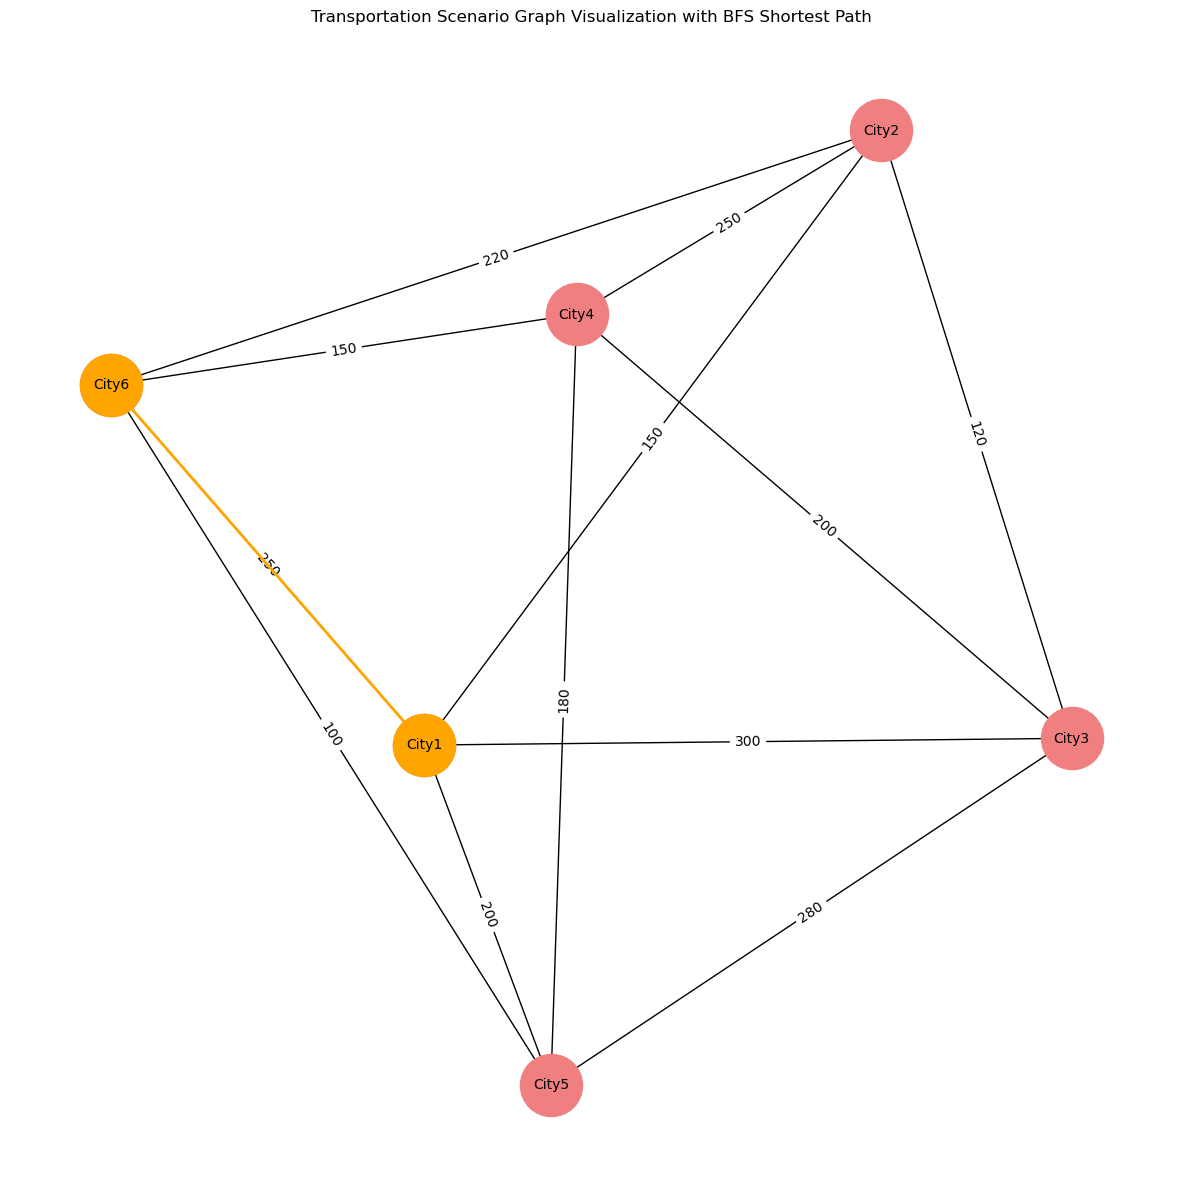

In [51]:
# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()

# Define a function to find the shortest path using Breadth-First Search (BFS)
def bfs_shortest_path_scenario(graph, start, goal):
    # Initialize a queue with the starting node and its path
    queue = deque([(start, [start])])

    while queue:
        # Dequeue the front node and its path
        current_node, path = queue.popleft()

        # Check if the current node is the goal
        if current_node == goal:
            return path

        # Explore neighbors and enqueue if not visited
        for neighbor in graph.neighbors(current_node):
            if neighbor not in path:
                queue.append((neighbor, path + [neighbor]))

# Define a function to visualize the graph with the highlighted BFS path
def visualize_graph_with_path_bfs_scenario(graph, path):
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(15, 15))

    # Use a spring layout for node positioning
    pos = nx.spring_layout(graph)

    # Extract edge labels indicating distances between cities
    edge_labels = {(node1, node2): attrs['distance'] for node1, node2, attrs in graph.edges(data=True)}

    # Draw the graph with nodes, labels, and edges
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightcoral', font_size=10, font_color='black', ax=ax)
    
    # Add edge labels indicating distances
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Highlight the BFS path
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='orange', node_size=2000)
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='orange', width=2)

    # Set the title for the visualization
    plt.title("Transportation Scenario Graph Visualization with BFS Shortest Path")

    # Display the plot
    plt.show()

# Find and visualize the shortest path using BFS for the transportation scenario graph
start_city_bfs = 'City1'
goal_city_bfs = 'City6'
shortest_path_bfs_scenario = bfs_shortest_path_scenario(scenario_graph, start_city_bfs, goal_city_bfs)

print(f"Shortest path from {start_city_bfs} to {goal_city_bfs} using BFS: {shortest_path_bfs_scenario}")

# Visualize the graph with the highlighted path for BFS
visualize_graph_with_path_bfs_scenario(scenario_graph, shortest_path_bfs_scenario)


### BEST FIRST SEARCH SHORTEST PATH

Shortest path from City1 to City6 using Best-First Search: ['City1', 'City2', 'City3', 'City4', 'City6']


<Figure size 2500x2500 with 0 Axes>

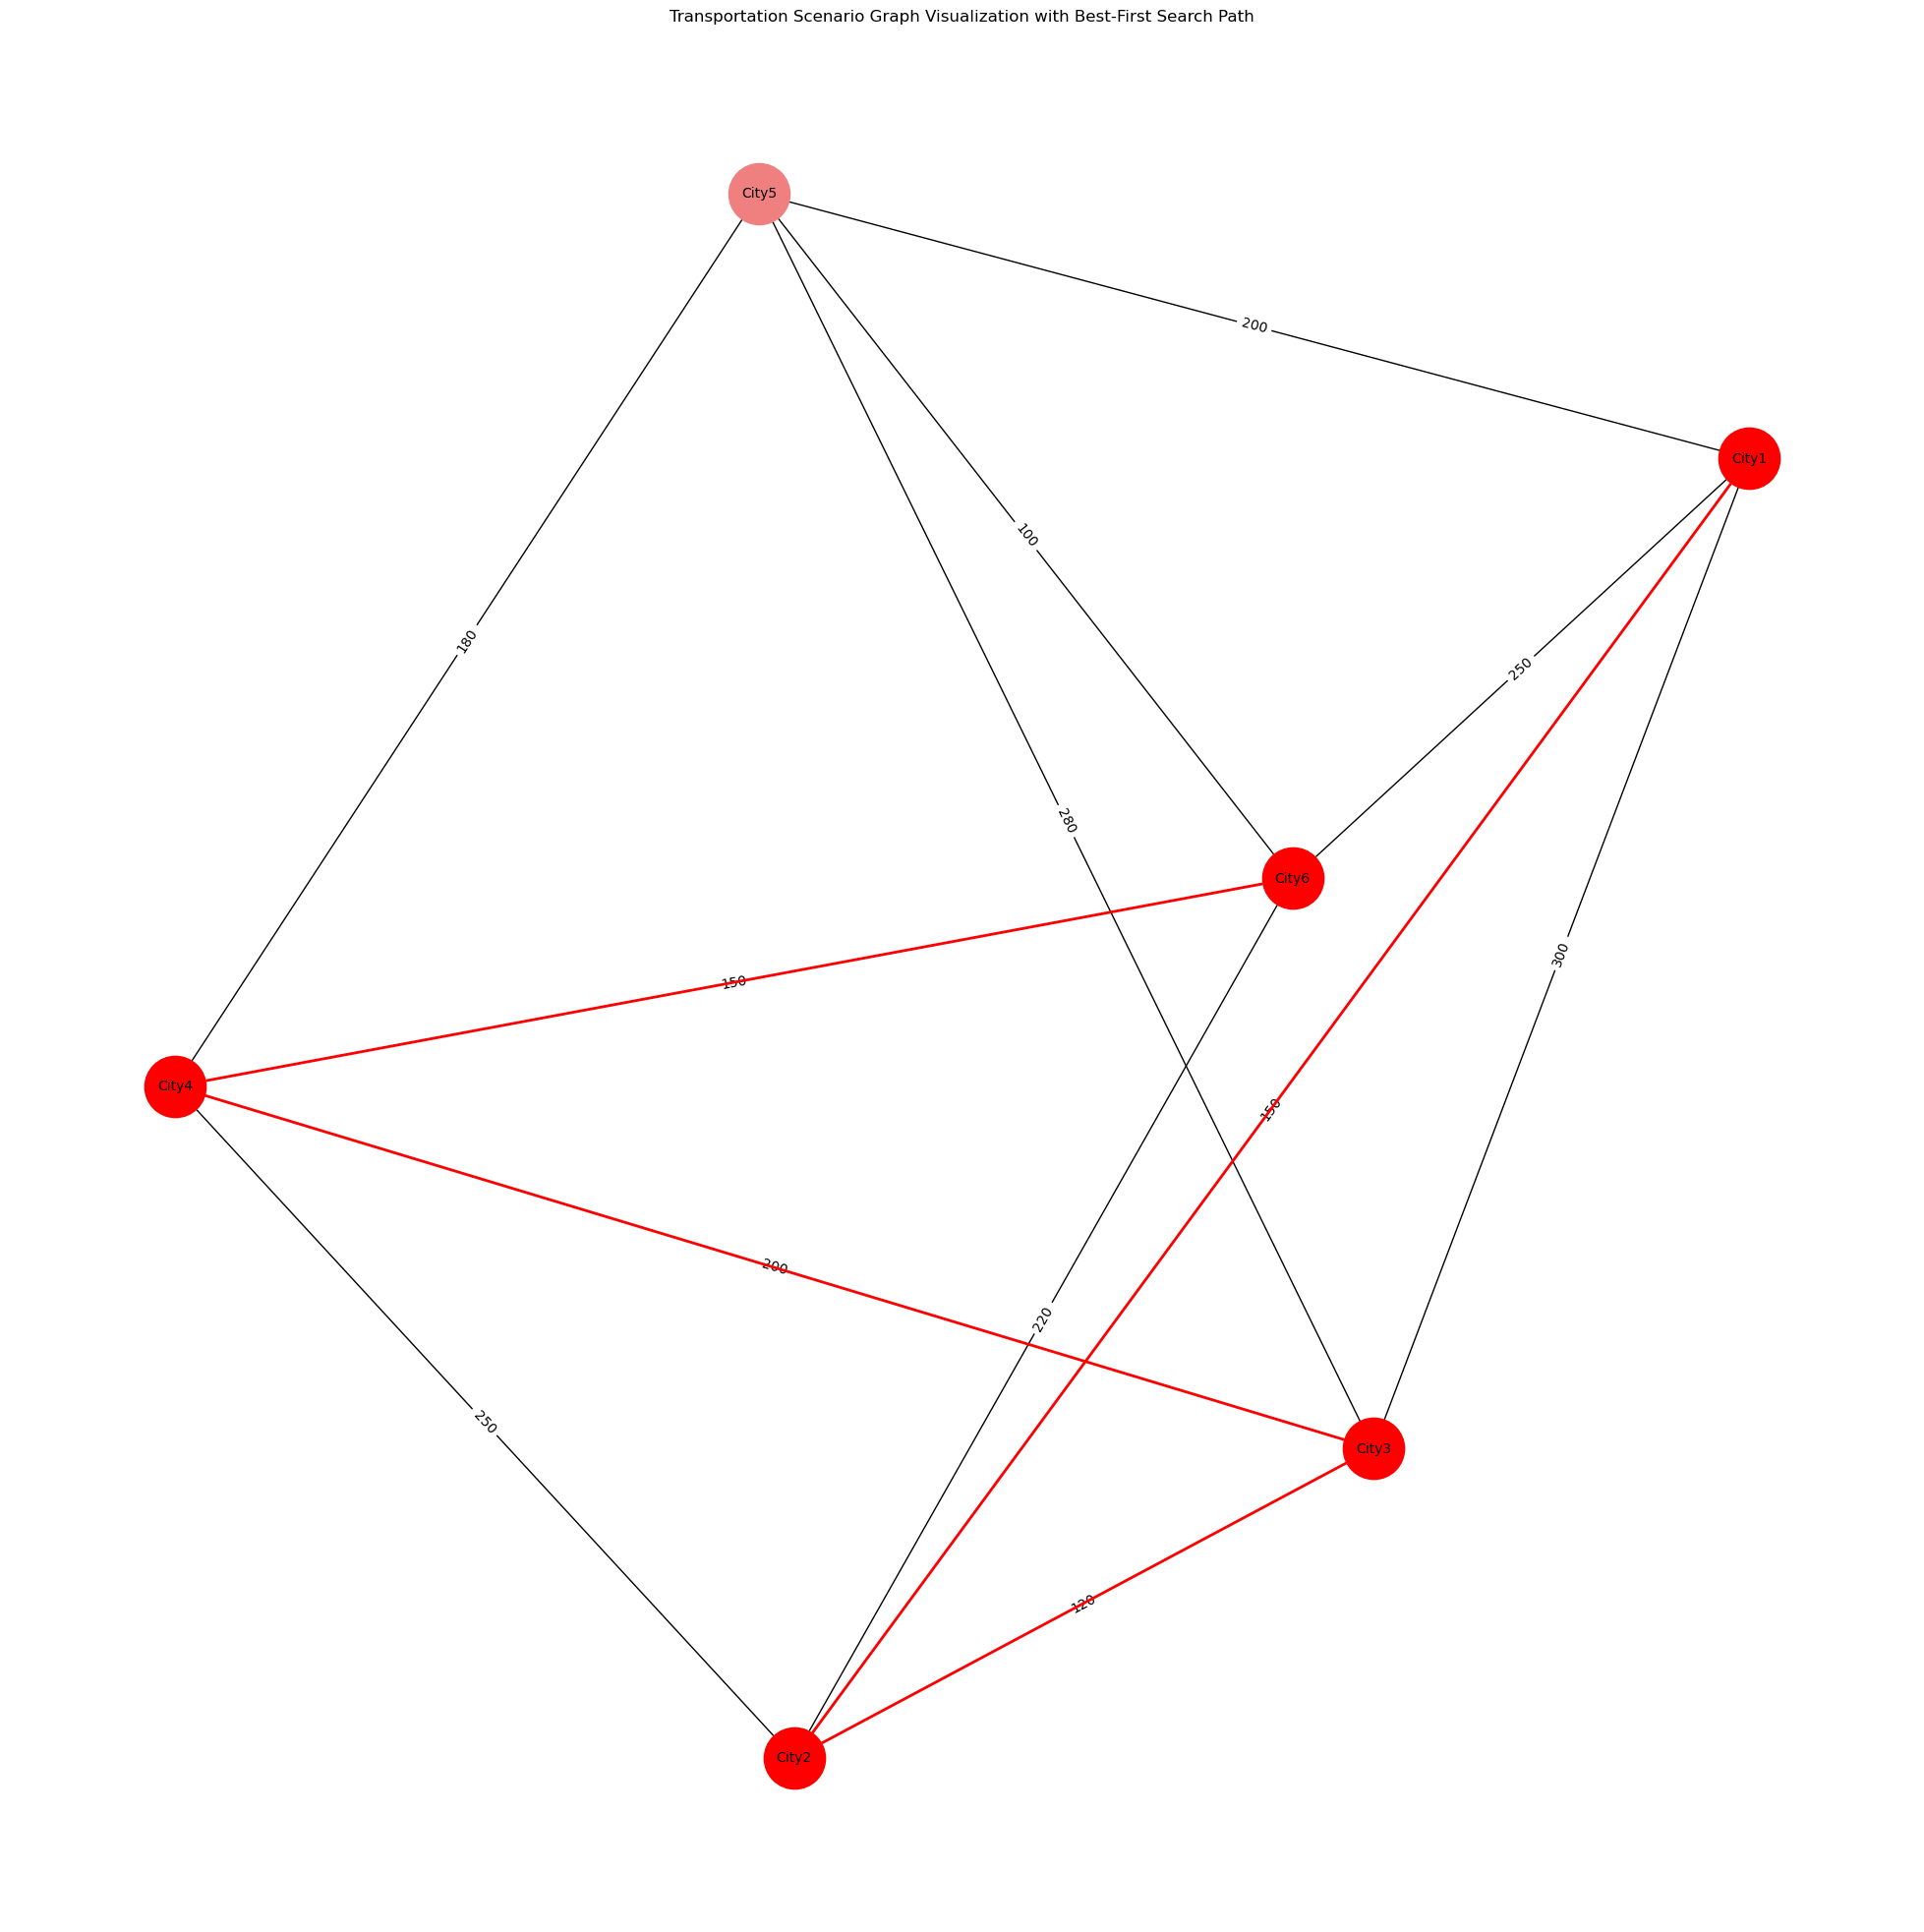

In [52]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Your create_custom_scenario_graph and visualize_scenario_graph functions

# Define a function for Best-First Search on the transportation scenario graph
def best_first_search_scenario(graph, start, goal):
    # Initialize a priority queue with the start node
    priority_queue = PriorityQueue()
    priority_queue.put((0, start))
    visited = set()

    while not priority_queue.empty():
        # Dequeue the node with the highest priority
        _, current_node = priority_queue.get()

        # Check if the current node is the goal
        if current_node == goal:
            # Reconstruct the path from the goal to the start
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = graph.nodes[current_node].get('previous', None)
            return path

        # If the current node has not been visited, explore its neighbors
        if current_node not in visited:
            visited.add(current_node)

            for neighbor, attrs in graph[current_node].items():
                if neighbor not in visited:
                    # Use 'distance' as the priority for Best-First Search
                    priority = attrs['distance']
                    priority_queue.put((priority, neighbor))
                    # Update the 'previous' attribute for path reconstruction
                    graph.nodes[neighbor]['previous'] = current_node

    return None

# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()

# Define a function to visualize the graph with the highlighted path for Best-First Search
def visualize_graph_with_path_best_first_scenario(graph, path):
    # Create a figure and axis for plotting
    plt.figure(figsize=(25, 25))
    pos = nx.spring_layout(graph)

    # Extract edge labels indicating distances between cities
    edge_labels = {(node1, node2): attrs['distance'] for node1, node2, attrs in graph.edges(data=True)}

    # Draw the graph with nodes, labels, and edges
    fig, ax = plt.subplots(figsize=(25, 25))
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightcoral', font_size=10, font_color='black', ax=ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Highlight the Best-First Search path in red
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='red', node_size=2000, ax=ax)
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2, ax=ax)

    # Set the title for the visualization
    plt.title("Transportation Scenario Graph Visualization with Best-First Search Path")

    # Display the plot
    plt.show()

# Find and visualize the shortest path using Best-First Search for the transportation scenario graph
start_city_best_first = 'City1'
goal_city_best_first = 'City6'
shortest_path_best_first_scenario = best_first_search_scenario(scenario_graph, start_city_best_first, goal_city_best_first)

# Print the shortest path found by Best-First Search
print(f"Shortest path from {start_city_best_first} to {goal_city_best_first} using Best-First Search: {shortest_path_best_first_scenario}")

# Visualize the graph with the highlighted path for Best-First Search
visualize_graph_with_path_best_first_scenario(scenario_graph, shortest_path_best_first_scenario)


## A* SEARCH SHORTEST PATH

<Figure size 1000x800 with 0 Axes>

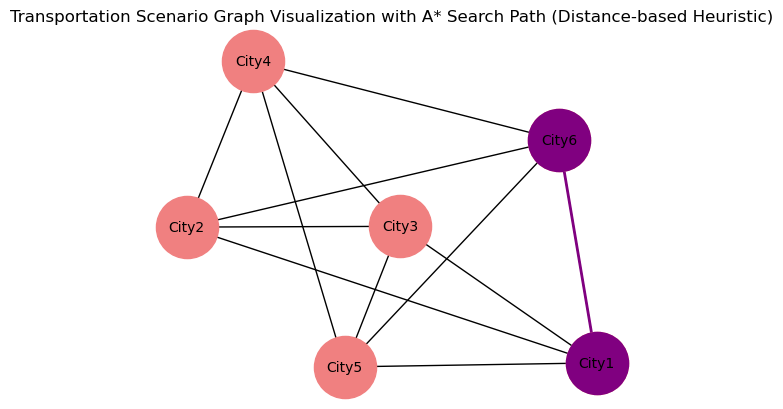

In [53]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Your create_custom_scenario_graph function

# Define a function for A* search on the transportation scenario graph
def astar_search(graph, start, goal, heuristic):
    # Initialize a priority queue with the start node
    priority_queue = PriorityQueue()
    priority_queue.put((0, start))
    visited = set()

    # Continue searching until the priority queue is empty
    while not priority_queue.empty():
        # Dequeue the node with the lowest total cost
        cost, current_node = priority_queue.get()

        # Check if the current node is the goal
        if current_node == goal:
            # Reconstruct the path from the goal to the start
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = graph.nodes[current_node].get('previous', None)
            return path

        # If the current node has not been visited, explore its neighbors
        if current_node not in visited:
            visited.add(current_node)

            for neighbor in graph.neighbors(current_node):
                if neighbor not in visited:
                    # Calculate the cost of reaching the neighbor
                    edge_cost = graph.edges[current_node, neighbor]['distance']
                    total_cost = cost + edge_cost
                    # Calculate the heuristic cost for the neighbor
                    heuristic_cost = heuristic(neighbor, goal, graph)
                    # Enqueue the neighbor with its total cost as priority
                    priority_queue.put((total_cost + heuristic_cost, neighbor))
                    # Update the 'previous' attribute for path reconstruction
                    graph.nodes[neighbor]['previous'] = current_node

    # Return None if no path is found
    return None

# Heuristic function estimating time based on accumulated distance
def distance_heuristic(node, goal, graph):
    # Calculate the remaining distance to the goal
    remaining_distance = nx.shortest_path_length(graph, source=node, target=goal, weight='distance')
    return remaining_distance

# Create the transportation scenario graph
scenario_graph = create_custom_scenario_graph()

# Define start and goal cities for A* search
start_city_astar = 'City1'
goal_city_astar = 'City6'

# Find the shortest path using A* with distance-based heuristic
shortest_path_astar_scenario = astar_search(scenario_graph, start_city_astar, goal_city_astar, heuristic=distance_heuristic)

# Visualize the graph with the highlighted path for A*
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(scenario_graph)

# Create a new figure and axes
fig, ax = plt.subplots()

# Draw nodes and edges
nx.draw(scenario_graph, pos, ax=ax, with_labels=True, node_size=2000, node_color='lightcoral', font_size=10, font_color='black')

# Highlight the path
path_edges_astar_scenario = [(shortest_path_astar_scenario[i], shortest_path_astar_scenario[i + 1]) for i in range(len(shortest_path_astar_scenario) - 1)]
nx.draw_networkx_nodes(scenario_graph, pos, nodelist=shortest_path_astar_scenario, node_color='purple', node_size=2000)
nx.draw_networkx_edges(scenario_graph, pos, edgelist=path_edges_astar_scenario, edge_color='purple', width=2)

# Set the title for the visualization
plt.title("Transportation Scenario Graph Visualization with A* Search Path (Distance-based Heuristic)")

# Display the plot
plt.show()


## MEASURE AND COMPARE EXECUTION TIME AND PATH LENGTH
- DFS
- BFS
- Best-First Search

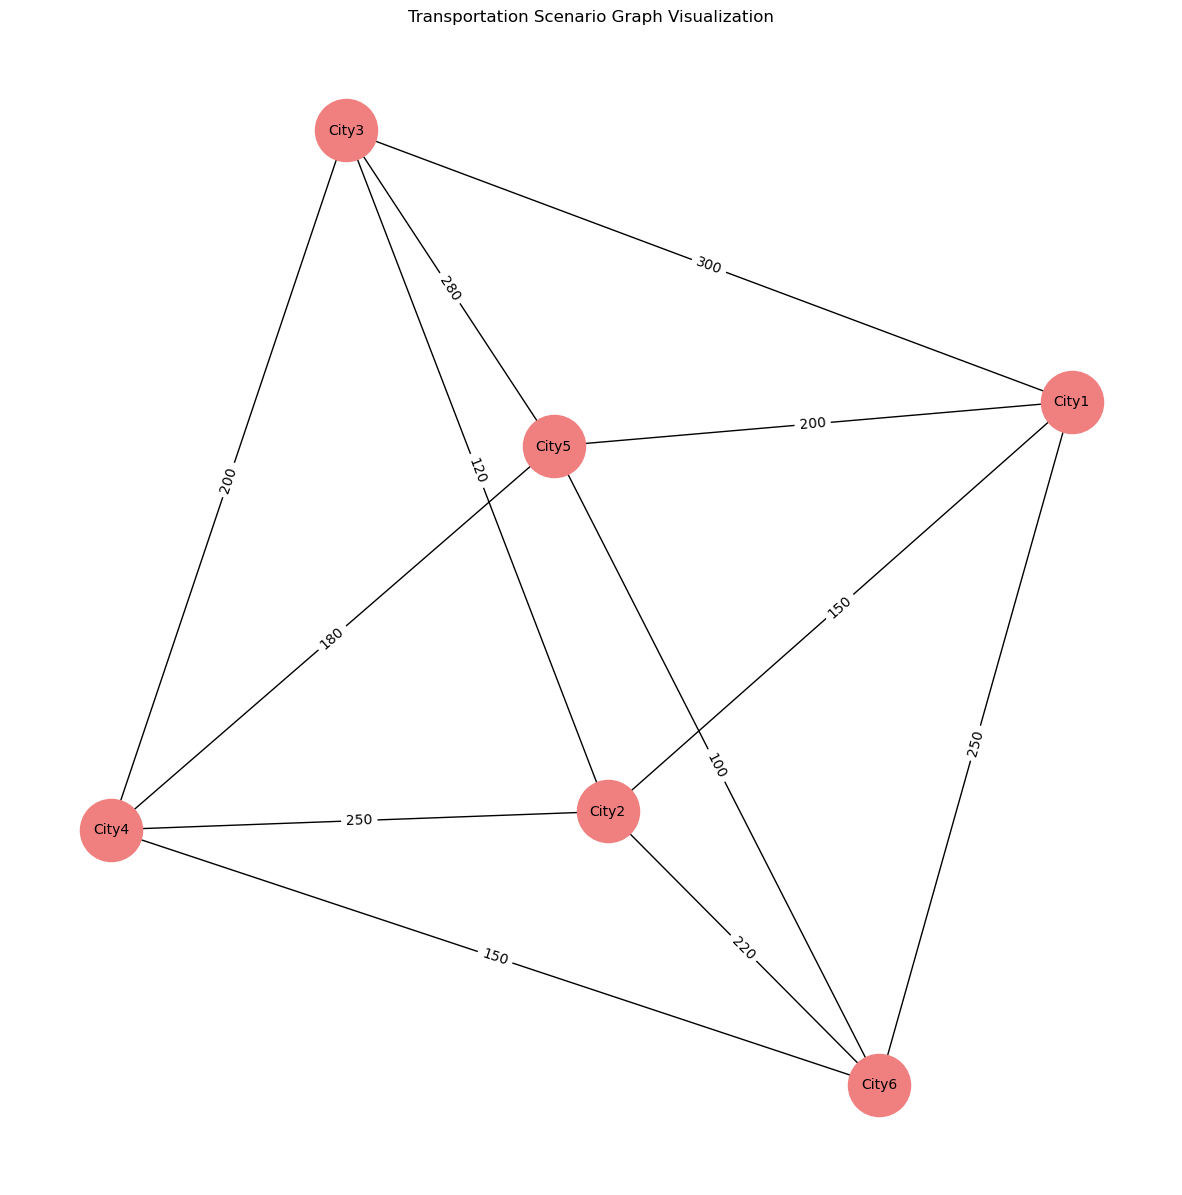


Results for DFS:
Shortest Path: ['City1', 'City5', 'City3', 'City4', 'City6']
Path Length: 4
Execution Time: 0.000000 seconds


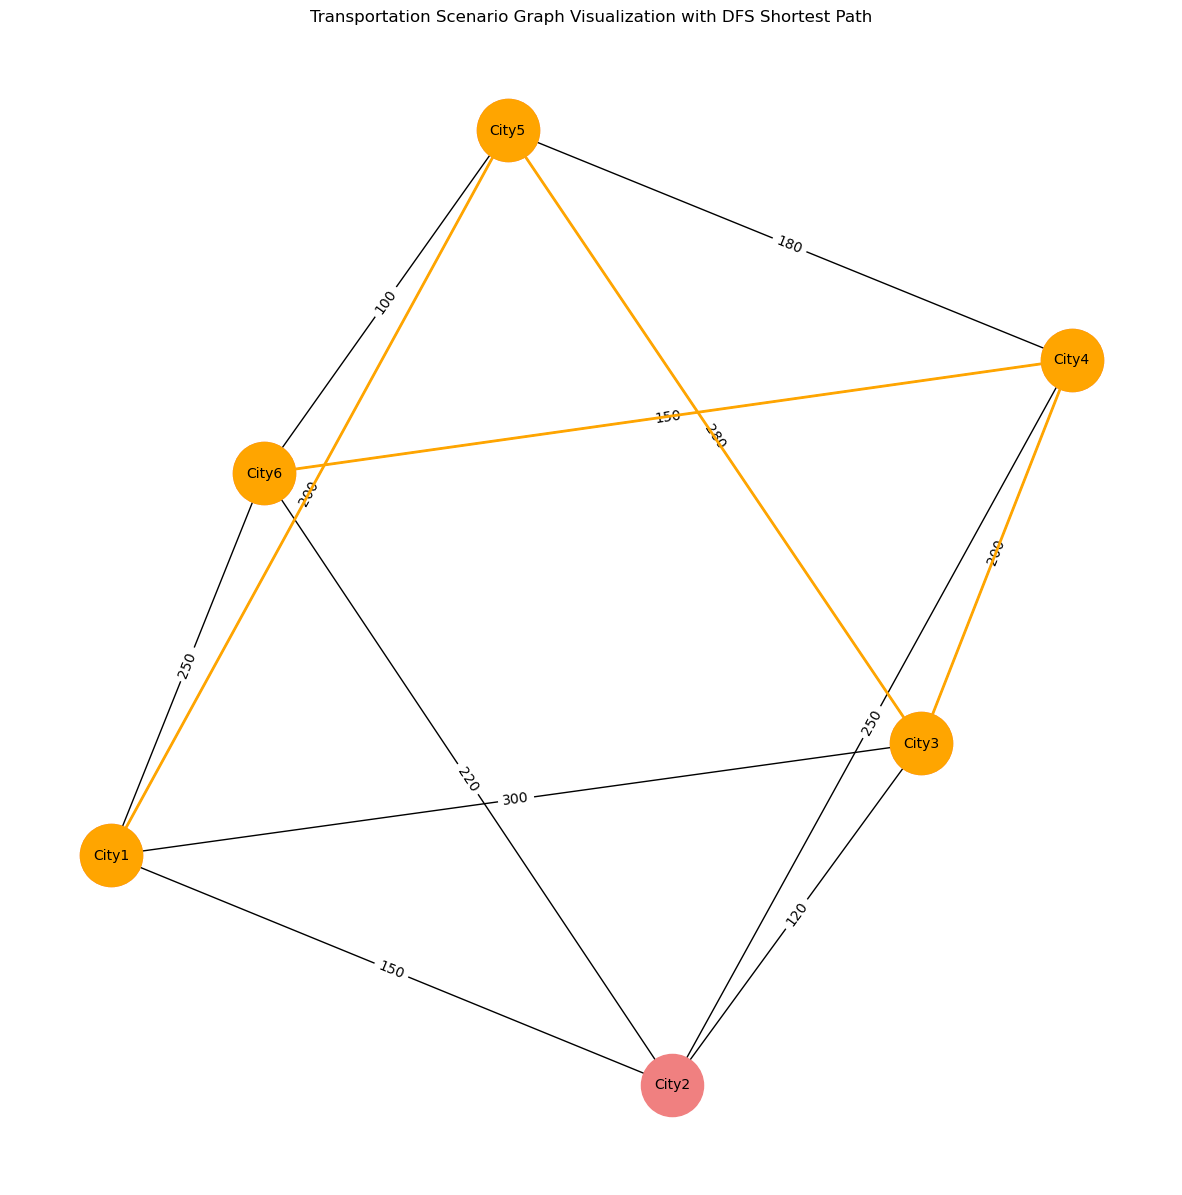



Results for BFS:
Shortest Path: ['City1', 'City6']
Path Length: 1
Execution Time: 0.000000 seconds


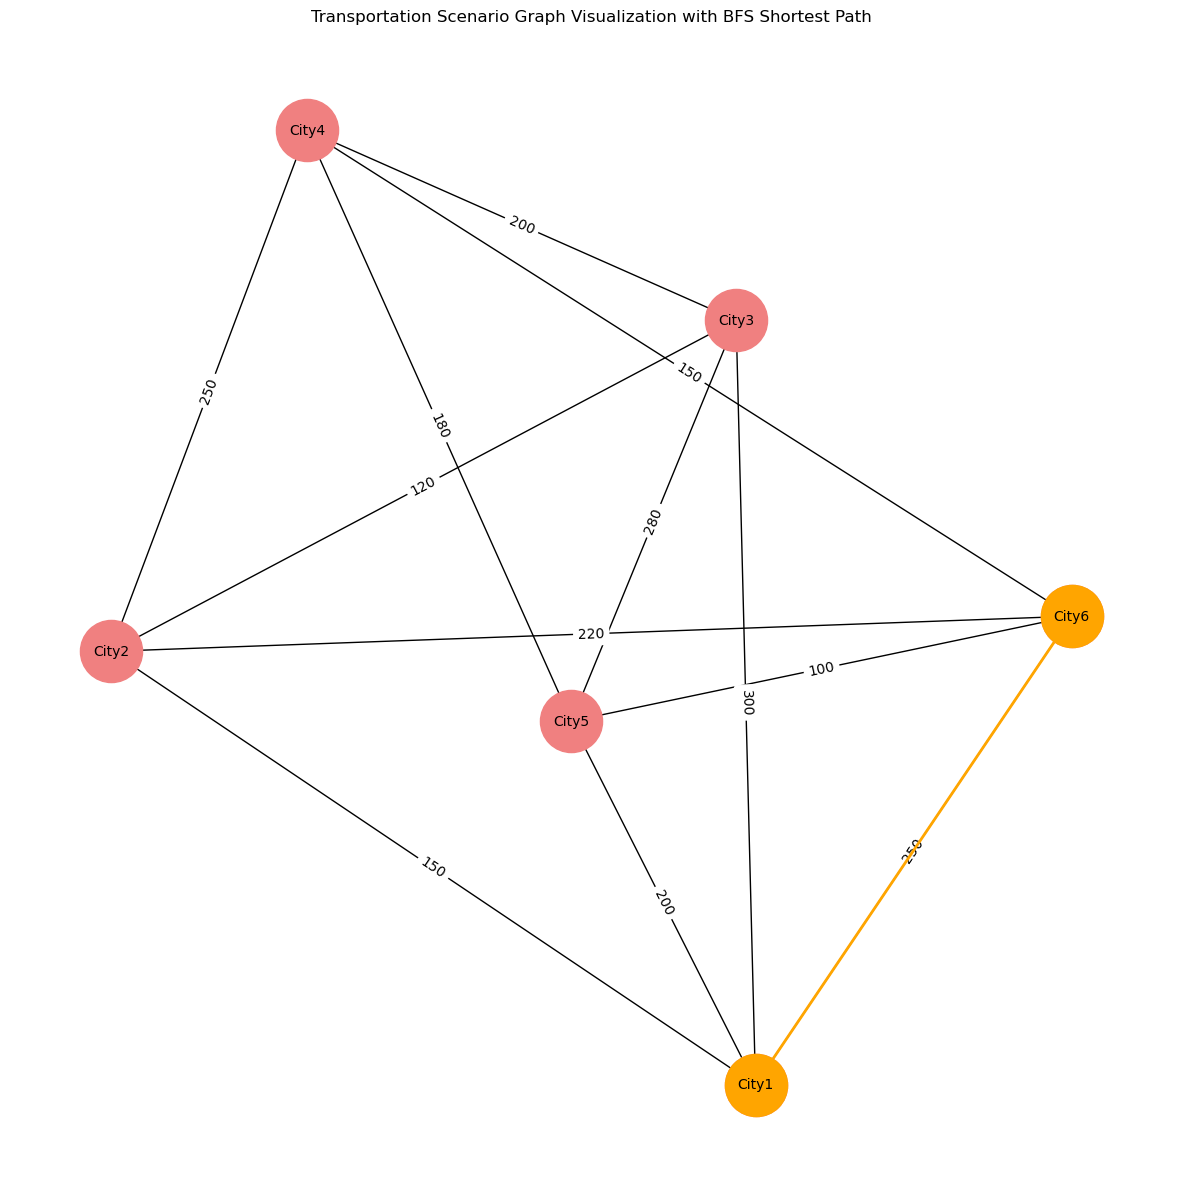



Results for Best-First Search:
Shortest Path: ['City1', 'City2', 'City3', 'City4', 'City6']
Path Length: 4
Execution Time: 0.000612 seconds



In [55]:
# Import the time module

# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()
visualize_scenario_graph(scenario_graph)

# Define start and goal cities
start_city = 'City1'
goal_city = 'City6'

# Measure and compare execution time and path length for BFS, DFS, and Best-First Search
algorithms = [
    ('DFS', dfs_shortest_path_scenario),
    ('BFS', bfs_shortest_path_scenario),
    ('Best-First Search', best_first_search_scenario)
]

# Iterate through each algorithm and measure its performance
for algorithm_name, algorithm_function in algorithms:
    # Record the start time of the algorithm execution
    start_time = time.time()
    
    # Find the shortest path using the current algorithm
    shortest_path = algorithm_function(scenario_graph, start_city, goal_city)
    
    # Record the end time of the algorithm execution
    end_time = time.time()

    # Print results for the current algorithm
    print(f"\nResults for {algorithm_name}:")
    
    # Check if a path is found
    if shortest_path:
        print(f"Shortest Path: {shortest_path}")
        print(f"Path Length: {len(shortest_path) - 1}")
    else:
        print(f"No path found from {start_city} to {goal_city}")
    
    # Print the execution time of the algorithm
    print(f"Execution Time: {end_time - start_time:.6f} seconds")

    # Visualize the graph with the highlighted path using the corresponding visualization function
    visualize_function = globals().get(f"visualize_graph_with_path_{algorithm_name.replace(' ', '_').lower()}_scenario", None)
    if visualize_function:
        visualize_function(scenario_graph, shortest_path)

    # Print a separator for better readability
    print("\n" + "=" * 40)


## OVERALL BEST PATH FOR THE TRANSPORTATION SCENARIO


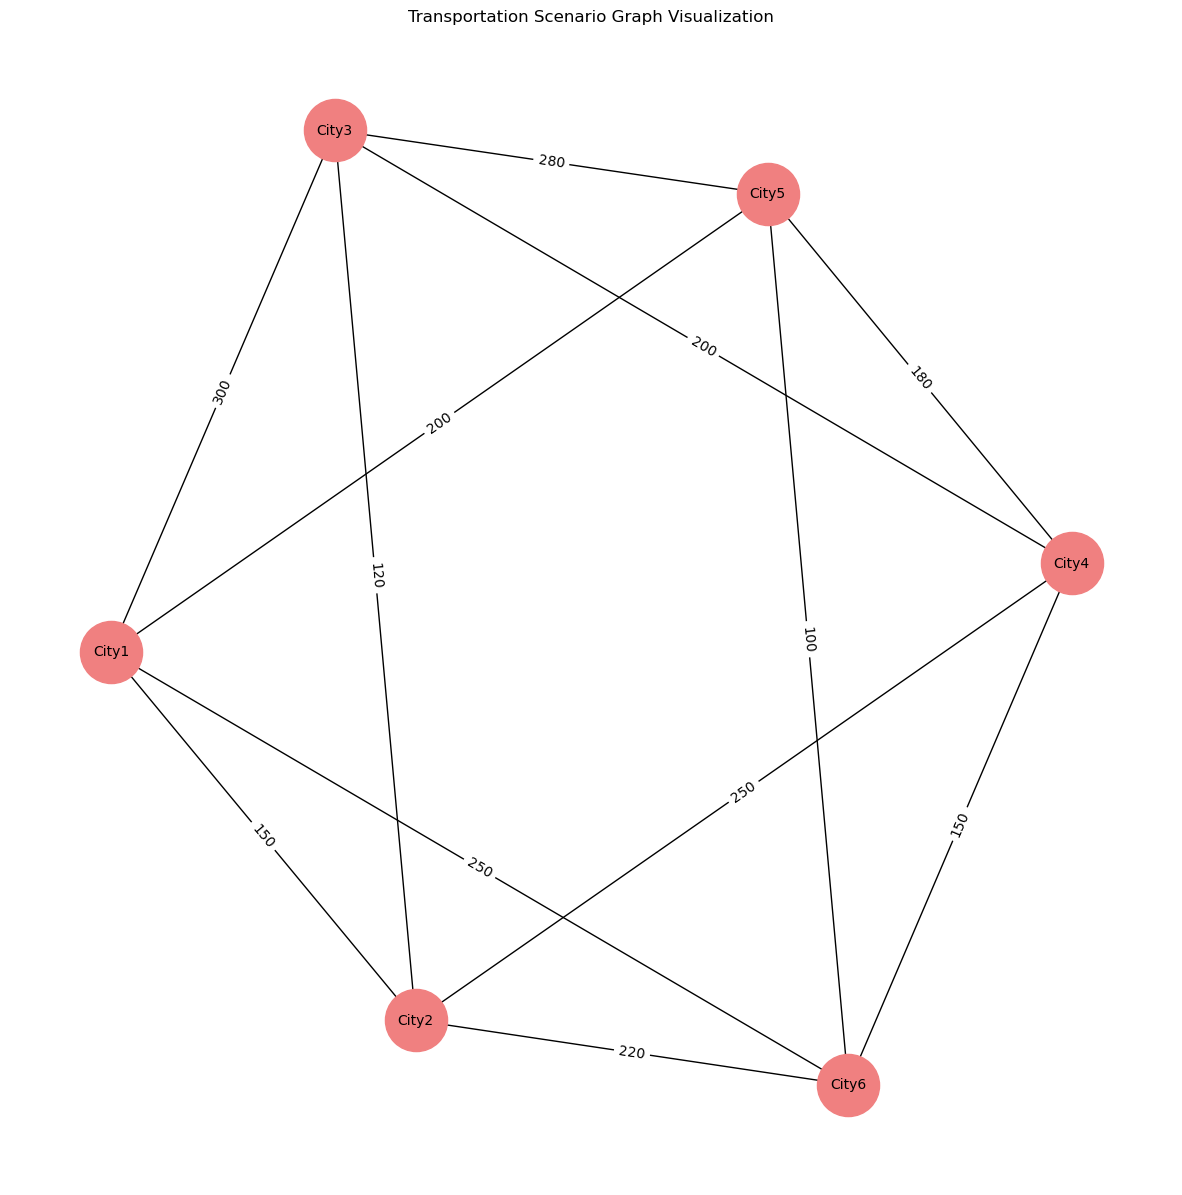


Results for DFS:
Shortest Path: ['City1', 'City5', 'City3', 'City4', 'City6']
Path Length: 4
Execution Time: 0.000000 seconds


Results for BFS:
Shortest Path: ['City1', 'City6']
Path Length: 1
Execution Time: 0.005382 seconds


Results for Best-First Search:
Shortest Path: ['City1', 'City2', 'City3', 'City4', 'City6']
Path Length: 4
Execution Time: 0.000000 seconds


Overall Best Path for Transportation Scenario: ['City1', 'City6']
Overall Best Path Length for Transportation Scenario: 1


In [56]:
# Import the time module

# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()
visualize_scenario_graph(scenario_graph)

# Define start and goal cities
start_city = 'City1'
goal_city = 'City6'

# Measure and compare execution time and path length for BFS, DFS, and Best-First Search
algorithms = [
    ('DFS', dfs_shortest_path_scenario),
    ('BFS', bfs_shortest_path_scenario),
    ('Best-First Search', best_first_search_scenario)
]

# Initialize variables to track the overall best path and its length
best_path_scenario = None
best_length_scenario = float('inf')

# Iterate through each algorithm and measure its performance
for algorithm_name, algorithm_function in algorithms:
    # Record the start time of the algorithm execution
    start_time = time.time()
    
    # Find the shortest path using the current algorithm
    shortest_path = algorithm_function(scenario_graph, start_city, goal_city)
    
    # Record the end time of the algorithm execution
    end_time = time.time()

    # Print results for the current algorithm
    print(f"\nResults for {algorithm_name}:")
    
    # Check if a path is found
    if shortest_path:
        # Calculate and print path length
        path_length = len(shortest_path) - 1
        print(f"Shortest Path: {shortest_path}")
        print(f"Path Length: {path_length}")
    else:
        print(f"No path found from {start_city} to {goal_city}")
        # Set path_length to infinity for cases where no path is found
        path_length = float('inf')
    
    # Print the execution time of the algorithm
    print(f"Execution Time: {end_time - start_time:.6f} seconds")

    # Update the overall best path and its length if the current path is shorter
    if path_length < best_length_scenario:
        best_length_scenario = path_length
        best_path_scenario = shortest_path

    # Print a separator for better readability
    print("\n" + "=" * 40)

# Print the overall best path and its length for the transportation scenario
print(f"\nOverall Best Path for Transportation Scenario: {best_path_scenario}")
print(f"Overall Best Path Length for Transportation Scenario: {best_length_scenario}")


## COMAPRISON OF PATH-LENGTH BY ALGORITHM FOR TRANSPORTATION SCENARIO

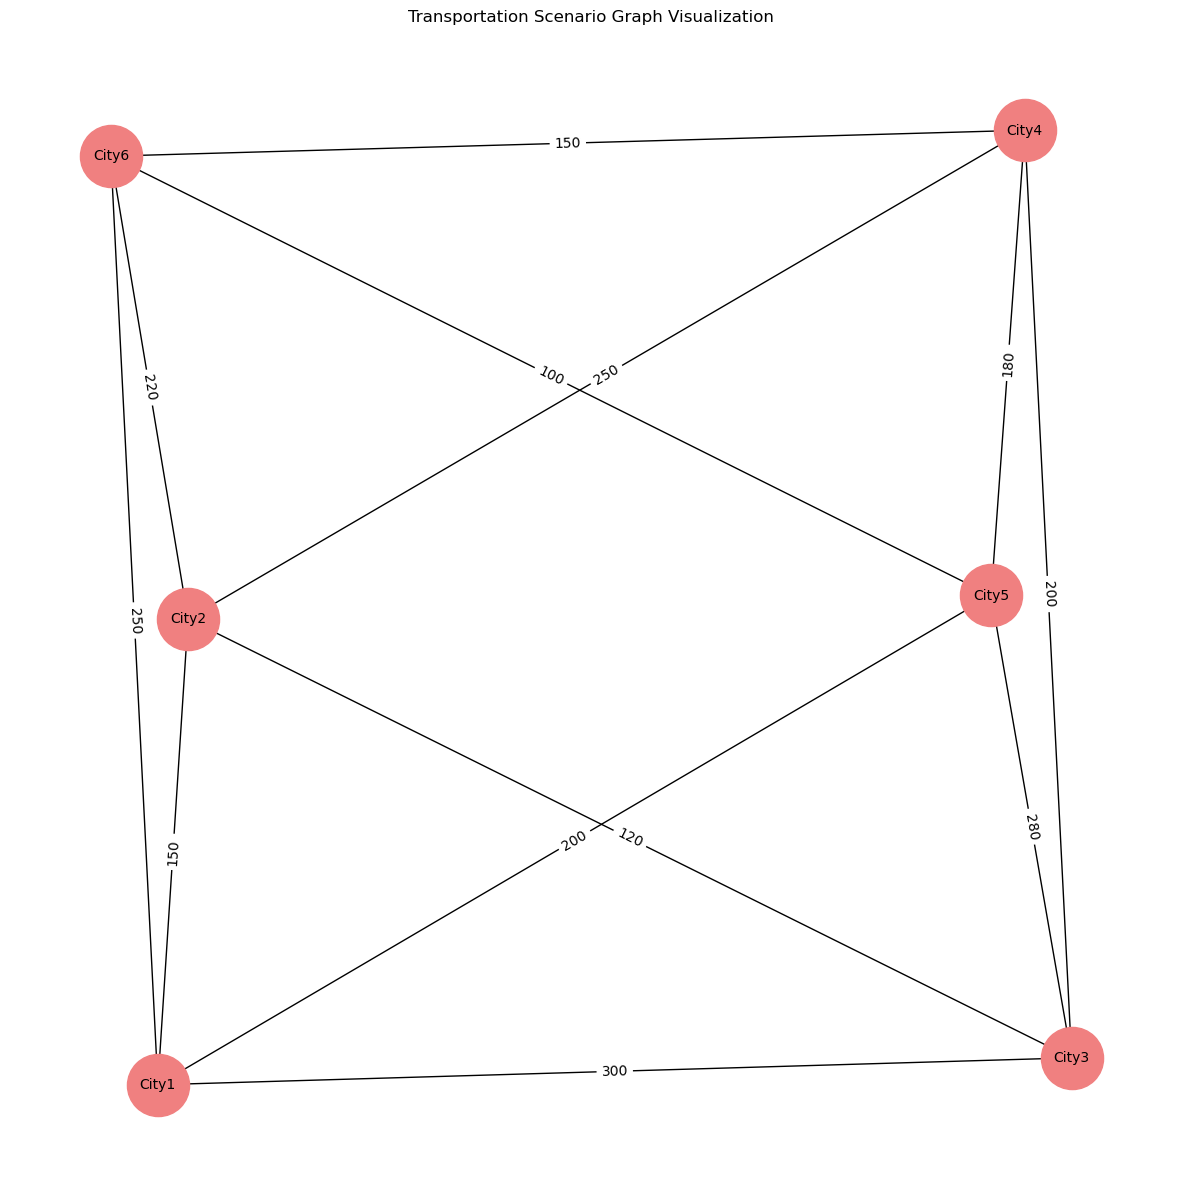


Results for DFS:
Shortest Path: ['City1', 'City5', 'City3', 'City4', 'City6']
Path Length: 4
Execution Time: 0.000000 seconds


Results for BFS:
Shortest Path: ['City1', 'City6']
Path Length: 1
Execution Time: 0.000000 seconds


Results for Best-First Search:
Shortest Path: ['City1', 'City2', 'City3', 'City4', 'City6']
Path Length: 4
Execution Time: 0.000000 seconds



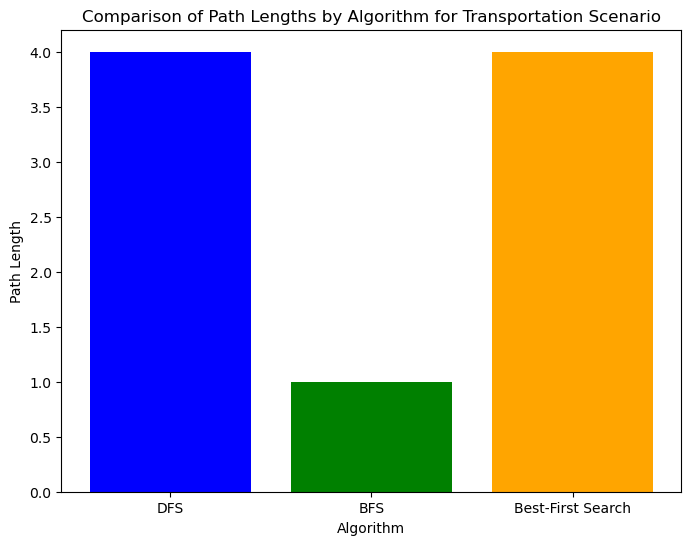

In [57]:
# Import the time module and the plotting library Matplotlib
import time
import matplotlib.pyplot as plt

# Create and visualize the transportation scenario graph
scenario_graph = create_custom_scenario_graph()
visualize_scenario_graph(scenario_graph)

# Define start and goal cities for path finding
start_city = 'City1'
goal_city = 'City6'

# Measure and compare execution time and path length for BFS, DFS, and Best-First Search
algorithms = [
    ('DFS', dfs_shortest_path_scenario),
    ('BFS', bfs_shortest_path_scenario),
    ('Best-First Search', best_first_search_scenario)
]

# Initialize an empty list to store path lengths for each algorithm
path_lengths_scenario = []

# Iterate through each algorithm and measure its performance
for algorithm_name, algorithm_function in algorithms:
    # Record the start time of the algorithm execution
    start_time = time.time()

    # Find the shortest path using the current algorithm
    shortest_path = algorithm_function(scenario_graph, start_city, goal_city)

    # Record the end time of the algorithm execution
    end_time = time.time()

    # Print results for the current algorithm
    print(f"\nResults for {algorithm_name}:")

    # Check if a path is found
    if shortest_path:
        # Calculate and print path length
        path_length = len(shortest_path) - 1
        print(f"Shortest Path: {shortest_path}")
        print(f"Path Length: {path_length}")
        # Append the path length to the list
        path_lengths_scenario.append(path_length)
    else:
        print(f"No path found from {start_city} to {goal_city}")

    # Print the execution time of the algorithm
    print(f"Execution Time: {end_time - start_time:.6f} seconds")

    # Print a separator for better readability
    print("\n" + "=" * 40)

# Plot a histogram for the transportation scenario with path lengths for each algorithm
plt.figure(figsize=(8, 6))
plt.bar([algorithm[0] for algorithm in algorithms], path_lengths_scenario, color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Path Length')
plt.title('Comparison of Path Lengths by Algorithm for Transportation Scenario')
plt.show()
